LotFrontage - linear feet of street connected to property

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
PATH='../data/'
train = pd.read_csv(PATH + 'train.csv')
test = pd.read_csv(PATH + 'test.csv')

col = 'LotFrontage'
col_train = train[col]
col_test = test[col]

# Stats

In [10]:
print("train missing", col_train.isnull().sum())
print("test missing", col_test.isnull().sum())

train missing 259
test missing 227


In [14]:
print('-----\ntrain\n-------')
print(col_train.describe())

print('-----\ntest\n-------')
print(col_test.describe())

-----
train
-------
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
-----
test
-------
count    1232.000000
mean       68.580357
std        22.376841
min        21.000000
25%        58.000000
50%        67.000000
75%        80.000000
max       200.000000
Name: LotFrontage, dtype: float64


# Distribution

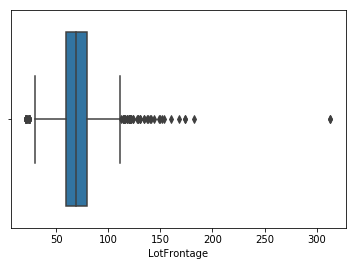

In [4]:
sns.boxplot(col_train)

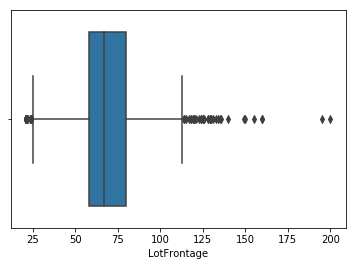

In [5]:
sns.boxplot(col_test)

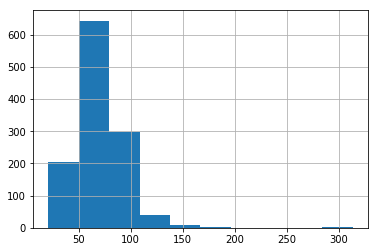

In [6]:
col_train.hist()

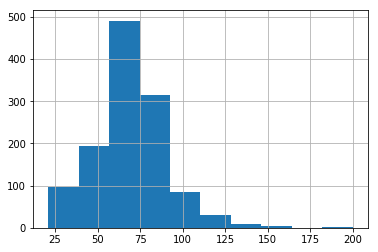

In [7]:
col_test.hist()

# Rows having missing values

In [21]:
# get the rows where col==null
train_col_null = train[col_train.isnull()]
train_col_null.LotFrontage.value_counts(dropna=False)

NaN    259
Name: LotFrontage, dtype: int64

In [42]:
# cols might relate to LotFrontage
cols = ['LotFrontage', 'Street', 'Alley', 'LotShape']
train_col_null[cols].head()

,LotFrontage,Street,Alley,LotShape
7,NaN,Pave,NaN,IR1
12,NaN,Pave,NaN,IR2
14,NaN,Pave,NaN,IR1
16,NaN,Pave,NaN,IR1
24,NaN,Pave,NaN,IR1


### Alley - type of alley access to property
- Grvl: Gravel
- Pave: Paved
- NA: No Alley Access

Most of the houses with missing LotFrontage has no Alley => this can mean that when house has no Alley, it has not LotFrontage. There are 5 exceptions to this rules

In [27]:
col_selected = 'Alley'
train_col_null[col_selected].value_counts(dropna=False)

NaN     254
Grvl      3
Pave      2
Name: Alley, dtype: int64

### LotShape - general shape of property
- Reg - regular
- IR1 - slightly irregular
- IR2 - moderately irregular
- IR3 - irregular

There are all kinds of LotShape in houses where LotFrontage is missing => **there is no relationship between LotShape and missing LotFrontage**

In [26]:
col_selected = 'LotShape'
train_col_null[col_selected].value_counts()

IR1    167
Reg     74
IR2     15
IR3      3
Name: LotShape, dtype: int64

## LotArea

**does not have any relationship with missing LotFrontage**

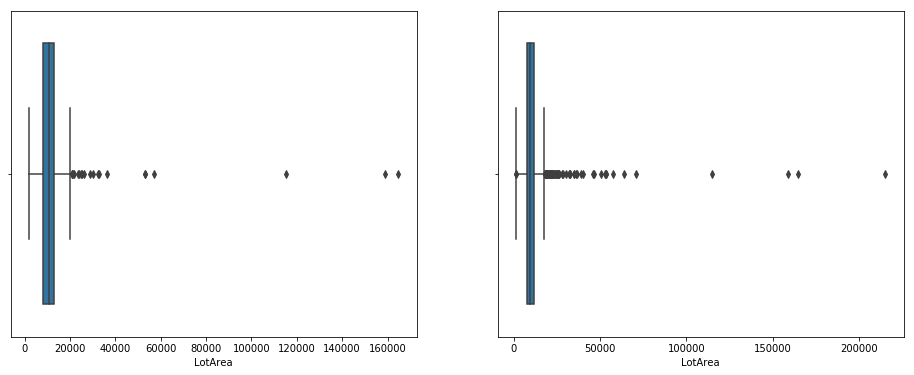

In [41]:
# distribution of LotArea where LotFrontage is missing and the whole train
col_selected = 'LotArea'
fig, ax = plt.subplots(1,2, figsize=(16, 6))
sns.boxplot(train_col_null[col_selected], ax=ax[0])
sns.boxplot(train[col_selected], ax=ax[1])

Not much difference in distributions of LotArea between the whole train set and the missing rows in train set.

# Row without missing values in LotFrontage

In [47]:
# get the rows where col!=null
train_col_notnull = train[~col_train.isnull()]

In [49]:
# cols might relate to LotFrontage
cols = ['LotFrontage', 'Street', 'Alley', 'LotShape']
train_col_notnull[cols].head()

,LotFrontage,Street,Alley,LotShape
0,65.0,Pave,NaN,Reg
1,80.0,Pave,NaN,Reg
2,68.0,Pave,NaN,IR1
3,60.0,Pave,NaN,IR1
4,84.0,Pave,NaN,IR1


In [53]:
col_selected = 'Street'
print('-------not null-------')
print(train_col_notnull[col_selected].value_counts())
print('------null-------')
print(train_col_null[col_selected].value_counts())

-------not null-------
Pave    1196
Grvl       5
Name: Street, dtype: int64
------null-------
Pave    258
Grvl      1
Name: Street, dtype: int64


In [54]:
col_selected = 'LotShape'
print('-------not null-------')
print(train_col_notnull[col_selected].value_counts())
print('------null-------')
print(train_col_null[col_selected].value_counts())

-------not null-------
Reg    851
IR1    317
IR2     26
IR3      7
Name: LotShape, dtype: int64
------null-------
IR1    167
Reg     74
IR2     15
IR3      3
Name: LotShape, dtype: int64


### Here, Alley=NaN as well when house has LotFrontage, so Alley=NaN does not seem to relate to missing values of LotFrontage. Street and LotShape does not have anything particular as well ==> it is reasonable to impute missing value of LotFrontage with 0.